# <font color='darkorange'>Classification: K-Nearest Neighbors (KNN)
---
</font>

*@ Jorge Alberto Tovar Jiménez*

Este modelo sirve tanto para predecir variables categóricas como para variables continuas. Cuando se usa para clasificación toma los `K` vecinos más cercanos para definir la clase.

Es importante buscar un `random_state` adecuado al momento de hacer el split, ya que esto afecta que tan bueno o malo resulta el modelo, además de la cantidad de datos para los test (*`test_size`*) cuando se realiza el split.

Problema: Clasificar el tipo de medicina que se de debe suministrar a un paciente.

Librerías:

In [1]:
import pandas as pd
import numpy as np

DataFrame:

In [2]:
df = pd.read_csv('./medicine.csv') 
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


Crear nArray X:

In [3]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values 
X[:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

Crear Y:

In [4]:
y = df['Drug']
y[:3]

0    drugY
1    drugC
2    drugC
Name: Drug, dtype: object

Hacer el split:

In [5]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=77, stratify=y, shuffle=True)
print ('Train set size:', X_train.shape,  y_train.shape)
print ('Test set size: ', X_test.shape,  y_test.shape)
y_test.value_counts()

Train set size: (140, 5) (140,)
Test set size:  (60, 5) (60,)


drugY    27
drugX    16
drugA     7
drugC     5
drugB     5
Name: Drug, dtype: int64

Crear modelo:

In [6]:
from sklearn.neighbors import KNeighborsClassifier

k = 3
KNN = KNeighborsClassifier(n_neighbors = k)

Entrenar modelo:

In [7]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Crear las predicciones de Test:

In [8]:
yhat = KNN.predict(X_test)
yhat[0:3]

array(['drugY', 'drugY', 'drugY'], dtype=object)

Evaluar modelo:

In [9]:
from sklearn import metrics

print(f'Train set Accuracy: {round(metrics.accuracy_score(y_train, KNN.predict(X_train))*100,2)}%')
print(f'Test set Accuracy: {round(metrics.accuracy_score(y_test, yhat)*100,2)} %')

Train set Accuracy: 81.43%
Test set Accuracy: 70.0 %


Buscar el mejor modelo variando `K`:

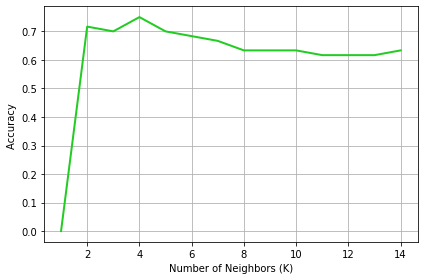

La mejor precisión de test fue:  0.75 	 cuando k= 4


In [10]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(2,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_ks=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_ks)

    
    std_acc[n-1]=np.std(yhat_ks==y_test)/np.sqrt(yhat_ks.shape[0])

mean_acc


import matplotlib.pyplot as plt

plt.plot(range(1,Ks), mean_acc,'#2c2', linewidth=2)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.grid()
plt.show()
print( "La mejor precisión de test fue: ", mean_acc.max(), "\t cuando k=", mean_acc.argmax()+1) 

Crear el modelo Optimizado:

In [11]:
k = mean_acc.argmax()+1
modeloKNN = KNeighborsClassifier(n_neighbors = k)

# Entrenar:
modeloKNN.fit(X_train,y_train)
yhat2 = modeloKNN.predict(X_test)

# Precisión:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, modeloKNN.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat2))

Train set Accuracy:  0.8071428571428572
Test set Accuracy:  0.75


Nuevas predicciones:

In [12]:
print(modeloKNN.predict([[22,1,1,1,15.335]])[0])
print(modeloKNN.predict([[57,0,0,0,3.091]])[0])
print(modeloKNN.predict([[17,1,0,1,8.091]])[0])
print(modeloKNN.predict([[32,1,1,1,13.091]])[0])
print(modeloKNN.predict([[52,0,2,0,23.091]])[0])
print(modeloKNN.predict([[9,0,1,0,11.091]])[0])

drugX
drugX
drugX
drugA
drugY
drugY


Gráfica de datos reales vs predicciones:

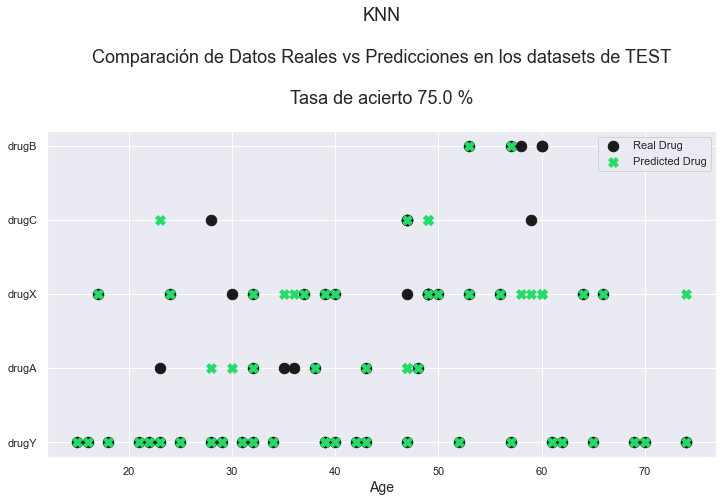

In [13]:
import seaborn as sns
sns.set()

plt.figure(figsize=(12,6))
real = plt.scatter(X_test[:,0], y_test, c='k', s=110)
predict = plt.scatter(X_test[:,0], yhat2, c='#2d6', marker='X', s=90)
plt.legend([real, predict], ['Real Drug', 'Predicted Drug'])
plt.title(f'KNN\n\nComparación de Datos Reales vs Predicciones en los datasets de TEST\n\nTasa de acierto {round((metrics.accuracy_score(y_test, yhat2))*100,2)} %\n', fontdict={'size':'18'})
plt.xlabel('Age', fontdict={'size':'14'})
plt.show()